In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
import math
import operator

cbb_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/NCAA%20Basketball%20Top%2025%20Ranked%20Teams%20(2008-2019)/CBB%20Preseason%20Rankings.csv")

In [3]:
print(cbb_data.loc[cbb_data['Round'] == 7])

     Year  Rank               Team  Round
1    2018     2        UVAVirginia      7
30   2017     6      VILLVillanova      7
54   2016     5  UNCNorth Carolina      7
85   2015    11      VILLVillanova      7
103  2014     4           DUKEDuke      7
142  2013    18          CONNUConn      7
151  2012     2      LOULouisville      7
176  2011     2         UKKentucky      7
233  2009     9           DUKEDuke      7


In [4]:
print(cbb_data.loc[cbb_data['Rank'] == 1])

     Year  Rank               Team  Round
0    2018     1           DUKEDuke      4
25   2017     1           DUKEDuke      4
50   2016     1      VILLVillanova      2
75   2015     1  UNCNorth Carolina      6
100  2014     1         UKKentucky      5
125  2013     1         UKKentucky      6
150  2012     1         INDIndiana      3
175  2011     1  UNCNorth Carolina      4
200  2010     1           DUKEDuke      3
225  2009     1           KUKansas      2


Text(0.5, 0.98, 'Performance of Preseason Top Ranked Teams in Tournamnet')

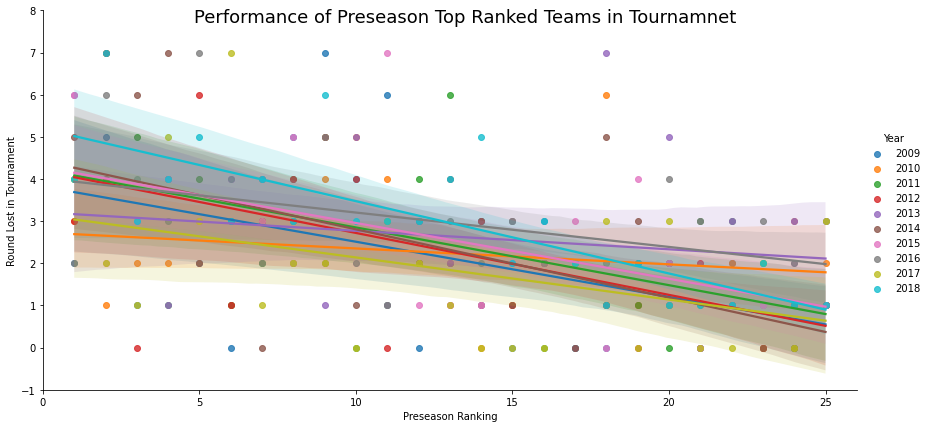

In [5]:
q=sns.lmplot(x='Rank', y='Round', hue='Year', data=cbb_data, height=6, aspect=2)
q.set(xlim=(0,26), ylim=(-1,8))
q.set_axis_labels("Preseason Ranking", "Round Lost in Tournament")
q.fig.suptitle("Performance of Preseason Top Ranked Teams in Tournamnet", fontsize = 18)

Text(0.5, 0.98, 'Performance of Preseason Top Ranked Teams - 2018')

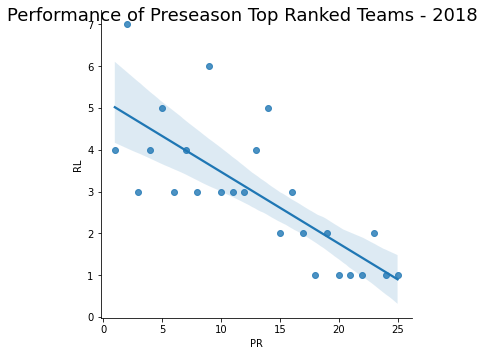

In [6]:
s=sns.lmplot(x='Rank',y='Round', data=cbb_data.loc[cbb_data['Year'] == 2018])
s.set_axis_labels("PR", "RL")
s.fig.suptitle("Performance of Preseason Top Ranked Teams - 2018", fontsize = 18)

[(2009, 2018)]

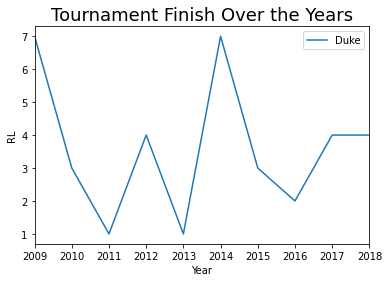

In [7]:
t=sns.lineplot(x='Year',y='Round',data=cbb_data.loc[cbb_data['Team'] == 'DUKEDuke'], label='Duke')
plt.ylabel("RL")
plt.title("Tournament Finish Over the Years", fontsize = 18)
t.set(xlim=(2009,2018))
[(2009, 2018)]

[(2009.0, 2018.0)]

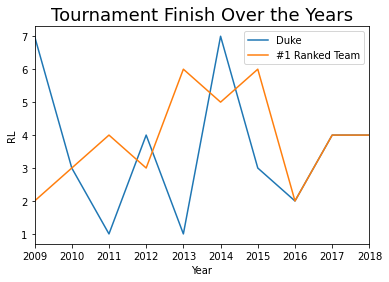

In [8]:
sns.lineplot(x='Year',y='Round',data=cbb_data.loc[cbb_data['Team'] == 'DUKEDuke'], label='Duke')
r=sns.lineplot(x='Year',y='Round',data=cbb_data.loc[cbb_data['Rank'] == 1], label='#1 Ranked Team')
plt.ylabel("RL")
plt.title("Tournament Finish Over the Years", fontsize = 18)
r.set(xlim=(2009,2018))

In [11]:
results = {}
count = {}

for x in range(len(cbb_data)):
    name = cbb_data['Team'][x]
    exp_finish = 7 - math.log(cbb_data['Rank'][x],2)
    result = cbb_data['Round'][x] - exp_finish
    if name in results:
        results[name] += result
        count[name] += 1
    else:
        results[name] = result
        count[name] = 1

avg_results = {}
for x in results:
    avg_results[x] = results[x] / count[x]

best_team = max(avg_results.items(), key=operator.itemgetter(1))[0]
print (best_team + " with the best average finish of " + str(avg_results[best_team]) + " in " + str(count[best_team]) + " appearance(s).")

TTUTexas Tech with the best average finish of 2.1699250014423126 in 1 appearance(s).


In [12]:
print ("Teams ranked by best average finish with 4 or more appearances:")
for x in sorted(avg_results, key = avg_results.__getitem__, reverse = True):
    if count[x] >= 4:
        print ("{}{}{}{}{}".format(x,': Avg = ',avg_results[x], ', count = ', count[x]))

Teams ranked by best average finish with 4 or more appearances:
BUTButler: Avg = 1.401659135894882, count = 4
WISWisconsin: Avg = 0.13841783080789705, count = 8
UVAVirginia: Avg = -0.21503749927884347, count = 5
FLAFlorida: Avg = -0.39534702494900154, count = 7
GONZGonzaga: Avg = -0.5057753115343149, count = 9
PURPurdue: Avg = -0.6233041188747349, count = 6
CINCincinnati: Avg = -0.9499014533291499, count = 5
VILLVillanova: Avg = -0.991455832607837, count = 7
MICHMichigan: Avg = -1.0051900924314137, count = 8
OSUOhio State: Avg = -1.051958281811137, count = 6
SYRSyracuse: Avg = -1.056829045894444, count = 5
LOULouisville: Avg = -1.096465269929369, count = 7
KUKansas: Avg = -1.236856890599748, count = 10
BAYBaylor: Avg = -1.2980774648461886, count = 7
UKKentucky: Avg = -1.3378863886725358, count = 10
WICHWichita State: Avg = -1.4326715701948303, count = 5
ISUIowa State: Avg = -1.450081913790909, count = 4
NDNotre Dame: Avg = -1.4571227202050299, count = 5
MSUMichigan State: Avg = -1.5000

(0.0, 7.0)

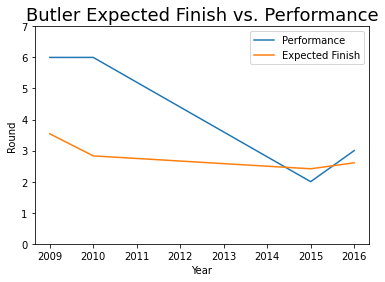

In [13]:
BUT_expected = pd.DataFrame({'Round': 7 - math.log(cbb_data['Rank'][i],2), 'Year': cbb_data['Year'][i]} for i in range(len(cbb_data)) if cbb_data['Team'][i] == 'BUTButler')
sns.lineplot(x = 'Year', y = 'Round', data=cbb_data.loc[cbb_data['Team'] == 'BUTButler'], label = 'Performance')
sns.lineplot(x='Year', y = 'Round', data= BUT_expected, label = 'Expected Finish')
plt.title("Butler Expected Finish vs. Performance", fontsize = 18)
plt.ylim(0,7)

(0.0, 7.0)

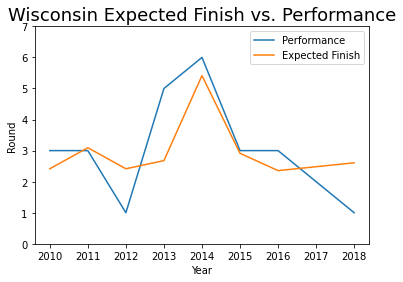

In [14]:
WIS_expected = pd.DataFrame({'Round': 7 - math.log(cbb_data['Rank'][i],2), 'Year': cbb_data['Year'][i]} for i in range(len(cbb_data)) if cbb_data['Team'][i] == 'WISWisconsin')
sns.lineplot(x = 'Year', y = 'Round', data=cbb_data.loc[cbb_data['Team'] == 'WISWisconsin'], label = 'Performance')
sns.lineplot(x='Year', y = 'Round', data= WIS_expected, label = 'Expected Finish')
plt.title("Wisconsin Expected Finish vs. Performance", fontsize = 18)
plt.ylim(0,7)

In [15]:
print (cbb_data.loc[cbb_data['Team'] == 'WISWisconsin'])

     Year  Rank          Team  Round
20   2018    21  WISWisconsin      1
74   2016    25  WISWisconsin      3
91   2015    17  WISWisconsin      3
102  2014     3  WISWisconsin      6
144  2013    20  WISWisconsin      5
173  2012    24  WISWisconsin      1
189  2011    15  WISWisconsin      3
223  2010    24  WISWisconsin      3
